In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


In [3]:
###Copy this for other files for full database combined
df06 = pd.read_csv("./Data/RB Research Data - 2006-2007.csv")
df07 = pd.read_csv("./Data/RB Research Data - 2007-2008.csv")
df08 = pd.read_csv("./Data/RB Research Data - 2008-2009.csv")
df09 = pd.read_csv("./Data/RB Research Data - 2009-2010.csv")
df10 = pd.read_csv("./Data/RB Research Data - 2010-2011.csv")
df11 = pd.read_csv("./Data/RB Research Data - 2011-2012.csv")
df12 = pd.read_csv("./Data/RB Research Data - 2012-2013.csv")
df13 = pd.read_csv("./Data/RB Research Data - 2013-2014.csv")
df14 = pd.read_csv("./Data/RB Research Data - 2014-2015.csv")
df15 = pd.read_csv("./Data/RB Research Data - 2015-2016.csv")
df16 = pd.read_csv("./Data/RB Research Data - 2016-2017.csv")
df17 = pd.read_csv("./Data/RB Research Data - 2017-2018.csv")
df18 = pd.read_csv("./Data/RB Research Data - 2018-2019.csv")
df19 = pd.read_csv("./Data/RB Research Data - 2019-2020.csv")
df20 = pd.read_csv("./Data/RB Research Data - 2020-2021.csv")
df21 = pd.read_csv("./Data/RB Research Data - 2021-2022.csv")
df22 = pd.read_csv("./Data/RB Research Data - 2022-2023.csv")
df = pd.concat([df06, df07, df08, df09, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20, df21, df22])
#df

In [4]:
df.dtypes

Player Name                              object
Team                                     object
Year                                      int64
Rookie Contract (Y/N)                    object
Contract Length                         float64
Total Pay                               float64
Yearly Pay (AAV)                        float64
Team Payroll                              int64
Player Percentage of Payroll            float64
Games Played                              int64
Snaps Played                              int64
Backfield Snaps                           int64
Slot Snaps                                int64
Wide snaps                                int64
QB Pressure Allowed (PR)                  int64
Total Pressure Oppurtnuties (OPP)         int64
Rush Attempts                             int64
Rush Yards                                int64
Rush YPA                                float64
Rush TDs                                  int64
Rush Yac (YCO)                          

In [5]:
dfdrop = df[df['AAV Adjusted'] != '#VALUE!']

#dfdrop['AAV Adjusted'] = dfdrop['AAV Adjusted'].str.replace('$', '').str.replace(',', '').astype(float)
#dfdrop['AAV Adjusted'] = dfdrop['AAV Adjusted'].str.replace(',', '', regex=True).astype(float)

result = dfdrop.groupby('Year')['AAV Adjusted'].mean()
result


Year
2006    4.942361e+06
2007    5.515339e+06
2008    6.061547e+06
2009    5.333065e+06
2010    4.180221e+06
2011    4.319299e+06
2012    6.471811e+06
2013    5.129489e+06
2014    3.659193e+06
2015    3.516669e+06
2016    3.033273e+06
2017    4.223205e+06
2018    3.682922e+06
2019    4.329725e+06
2020    5.004288e+06
2021    4.631649e+06
2022    5.137960e+06
Name: AAV Adjusted, dtype: float64

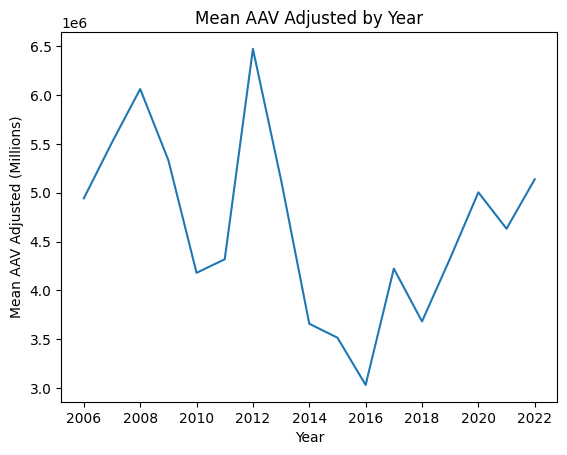

In [6]:
plt.plot(result.index, result.values)

plt.xlabel('Year')
plt.ylabel('Mean AAV Adjusted (Millions)')
plt.title('Mean AAV Adjusted by Year')

plt.show()

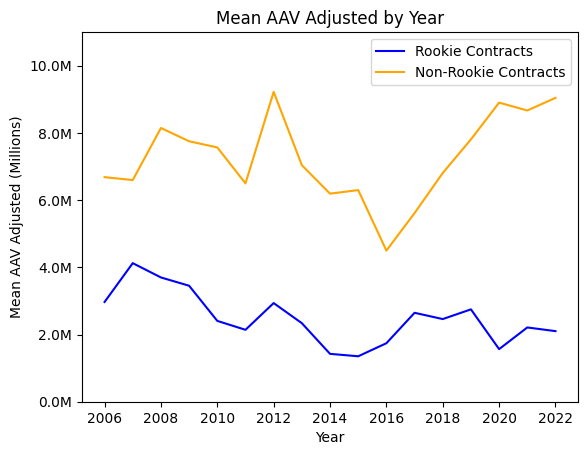

In [7]:
df_rook = dfdrop[dfdrop['Rookie Contract (Y/N)'] == 'Y']
df_not_rook = dfdrop[dfdrop['Rookie Contract (Y/N)'] == 'N']

result_rook = df_rook.groupby('Year')['AAV Adjusted'].mean()
result_not_rook = df_not_rook.groupby('Year')['AAV Adjusted'].mean()

plt.plot(result_rook.index, result_rook.values, label='Rookie Contracts', color='blue')
plt.plot(result_not_rook.index, result_not_rook.values, label='Non-Rookie Contracts', color='orange')

plt.xlabel('Year')
plt.ylabel('Mean AAV Adjusted (Millions)')
plt.title('Mean AAV Adjusted by Year')

def millions_formatter(x, pos):
    return f'{x / 1e6:.1f}M'

plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.ylim(0, 11_000_000)  

plt.legend()

plt.show()

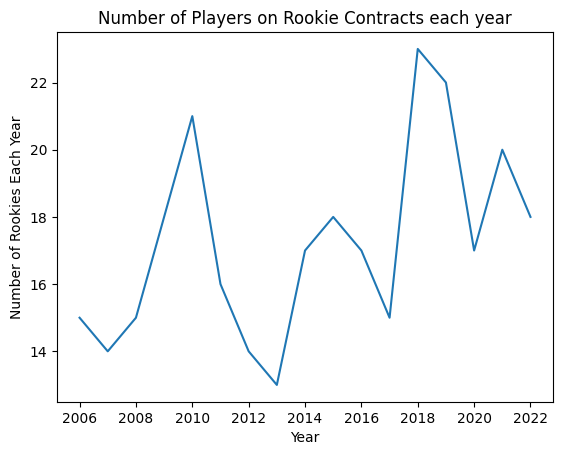

In [8]:
rookie_contract_df = dfdrop[dfdrop['Rookie Contract (Y/N)'] == 'Y']

result = rookie_contract_df.groupby('Year')['Rookie Contract (Y/N)'].count()

plt.plot(result.index, result.values)

plt.xlabel('Year')
plt.ylabel('Number of Rookies Each Year')
plt.title('Number of Players on Rookie Contracts each year')

plt.show()

In [9]:
dfx10 = pd.concat([df06, df07, df08, df09, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20, df21, df22])
dfdropx10 = dfx10[dfx10['AAV Adjusted'] != '#VALUE!']

dfdropx10['Payroll Adjusted'] = dfdropx10['Payroll Adjusted'].str.replace('$', '').str.replace(',', '').astype(float)
result = dfdropx10.groupby('Year')['Payroll Adjusted'].mean()
#result

AttributeError: Can only use .str accessor with string values!

In [ ]:
plt.plot(result.index, result.values)

plt.xlabel('Year')
plt.ylabel('Salary Cap (Millions)')
plt.title('Salary Cap adjusted for inflation')
def millions_formatter(x, pos):
    return f'{x / 1e6:.1f}M'

plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.show()